# validate_preprocessed_h5.ipynb
M. Dolce.
Oct. 2023
### Simple notebook to open and examine pre-processed file(s) and make sure they look OK. 

## NOTE: pre-processed files should ONLY have the vtx.{x,y,z} and cvnmap !

In [1]:
import os.path
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
# define the path to the files
preprocess_path = '/Users/michaeldolce/Development/files/h5-files/preprocessed/'

# TODO: add argparse (?) to read in flux, and swap
# TODO: even later in future, add detector option...
# processed_file = 'preprocessed_trimmed_h5_R20-11-25-prod5.1reco.j_FD-Nominal-FHC-Fluxswap_3_of_28.h5' # use the one file for now # a corrupted file (Oct. 16)
processed_file = 'preprocessed_trimmed_h5_R20-11-25-prod5.1reco.j_FD-Nominal-FHC-Fluxswap_15_of_28.h5' # use the one file for now # 

file_h5 = h5py.File(preprocess_path + processed_file, 'r', ) # open the file:
file_h5.keys() # see what is in the file
print ("Number of events: ", len(file_h5['vtx.x']))  # count the number of events in the file

Number of events:  507939


In [14]:
# create dataframe from the h5 file
# Retrieve the vertex information

# Create the DataFrame directly from the h5 file
df = pd.DataFrame({'vtx.x': file_h5['vtx.x'][:],
                   'vtx.y': file_h5['vtx.y'][:],
                   'vtx.z': file_h5['vtx.z'][:],
                   # 'cvnmap': file_h5['cvnmap'][:],
                   })

# df.head() # check the head of the dataframe
# df.describe() # describe the dataframe
print(df.columns) # print the columns of the dataframe
# df.info() # get info on the dataframe


Index(['vtx.x', 'vtx.y', 'vtx.z'], dtype='object')


In [19]:
# Retrieve the CVN information
# needs to be placed into an array, cannot go into DataFrame() bc not 1-dimensional

print('events, ', file_h5['cvnmap'].shape[0])
print('shape of cvnmap, ', file_h5['cvnmap'][0].shape)

cvnmap_array = [file_h5['cvnmap'][:]]

# make a re-shaped array from the 0th event, only:
cvnmap_array_resh = cvnmap_array[0].reshape(2, 100, 80)
# attempting to do line above over the 0th event gives this error:
#ValueError: cannot reshape array of size 8127024000 into shape (2,100,80)
# TODO: check this with line 26 of x model training. Does it give same error?

print(cvnmap_array_resh)


events,  507939
shape of cvnmap,  (16000,)


ValueError: cannot reshape array of size 8127024000 into shape (2,100,80)

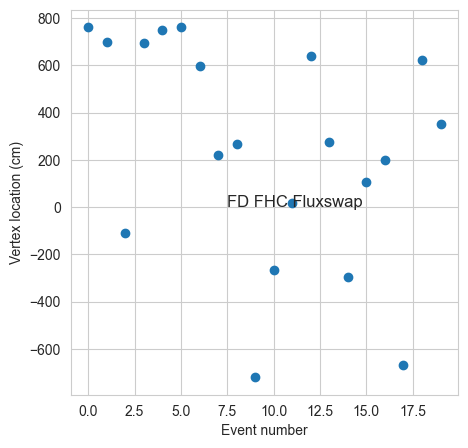

In [26]:
# Plot the Energy of the nue and numu events
fig = plt.figure(figsize=(5,5))

plt.scatter(np.arange(0,20, 1), df['vtx.x'].tail(20))

plt.xlabel('Event number')
plt.ylabel('Vertex location (cm)')
plt.text(7.5, 1.5, 'FD FHC Fluxswap', fontsize=12)
plt.show()
# for ext in ['pdf', 'png']:
#     fig.savefig('vtx.' + ext, dpi=300)
    
